In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn import svm, tree
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, f1_score
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import scikitplot as skplt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import RandomOverSampler

In [2]:
stroke = pd.read_csv("brain_stroke.csv")
stroke.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [3]:
stroke.shape

(4981, 11)

In [4]:
stroke.dtypes

gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

## **Explaroty Data Analysis**
Data Visualization

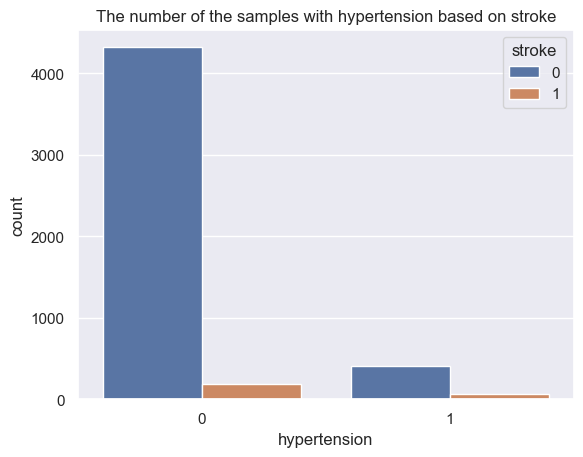

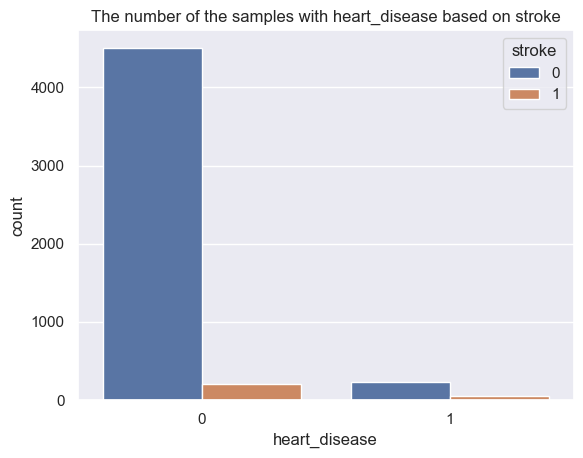

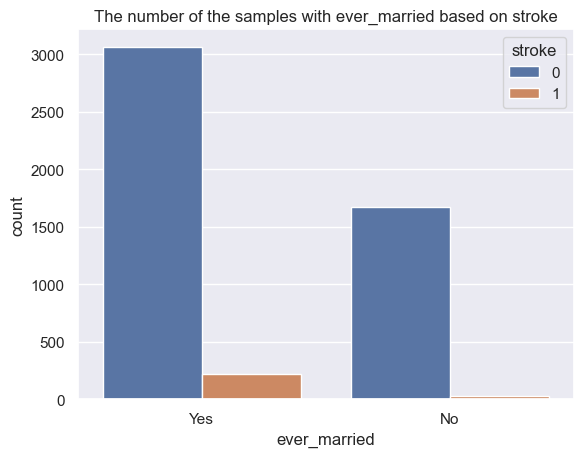

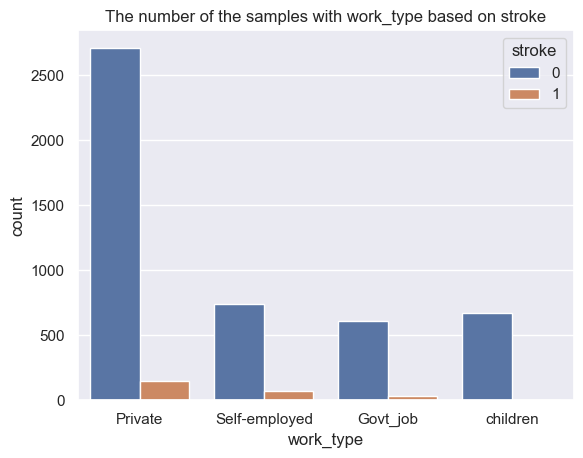

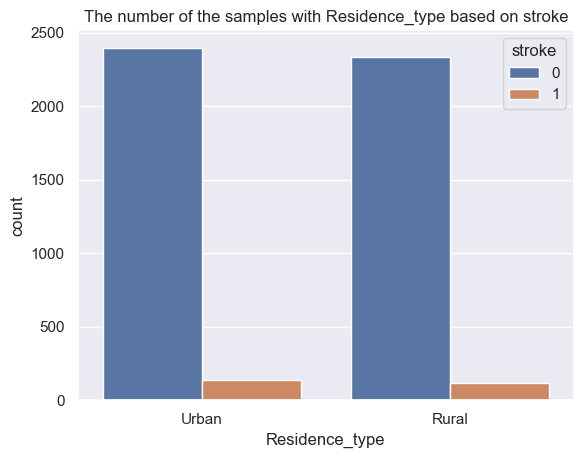

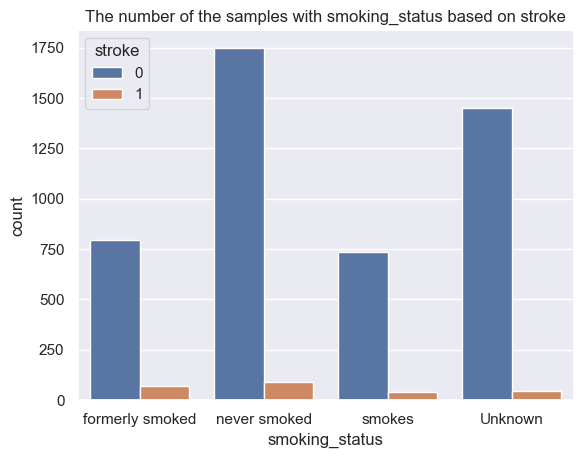

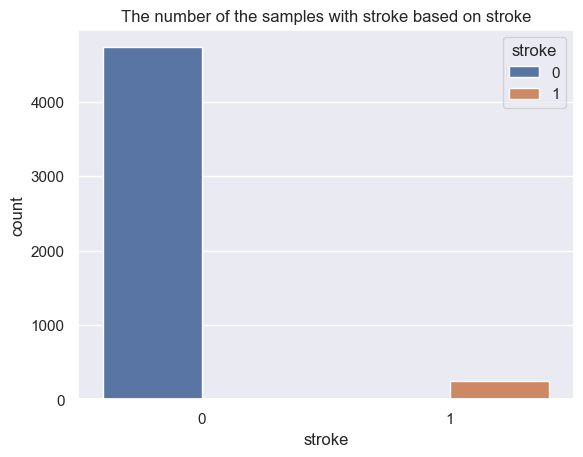

In [5]:
sns.set_theme(style = 'darkgrid')
for i in stroke.columns[1:]:
    if (stroke[i].dtype == 'object') or (stroke[i].dtype == 'int64'):
            sns.countplot(data = stroke, x = i, hue = 'stroke')
            plt.title('The number of the samples with {} based on stroke'.format(i))
            plt.show()

#Stroke data is imbalanced, this require further explanation

C:\Users\noel\anaconda3\envs\data\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


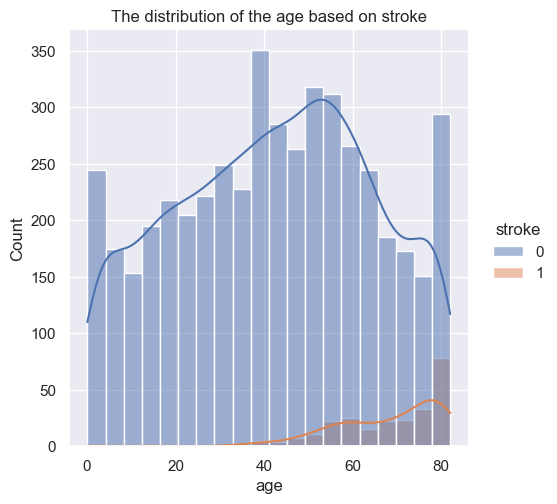

C:\Users\noel\anaconda3\envs\data\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


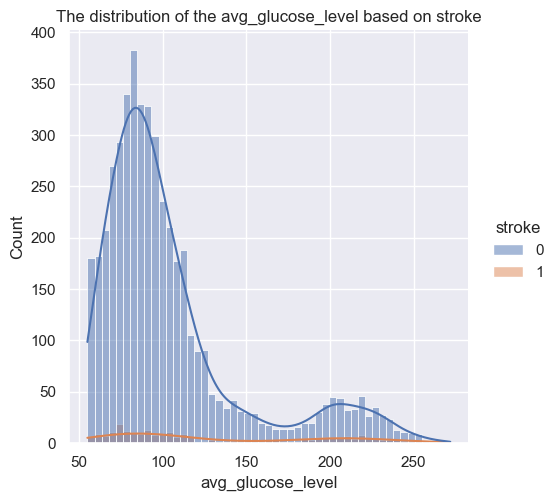

C:\Users\noel\anaconda3\envs\data\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


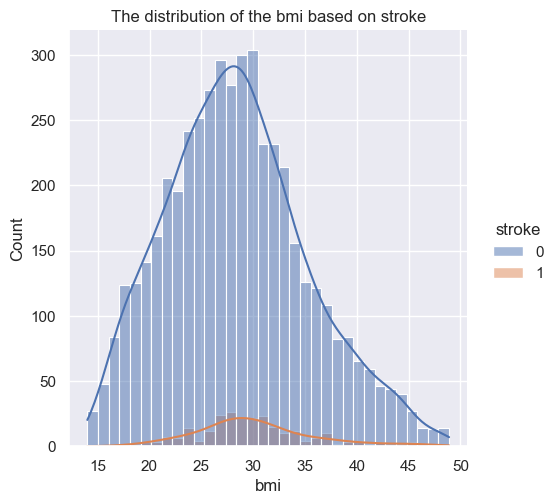

In [6]:
sns.set_theme(style = 'darkgrid')
for i in stroke.columns[:-1]:
    if stroke[i].dtype == 'float64':
            sns.displot(data = stroke, x = i, hue = 'stroke', kde = True)
            plt.title('The distribution of the {} based on stroke'.format(i))
            plt.show()



## **Data Preprocessing**
1. Clean Null
2. Detect Outliers

In [7]:
#Drop All Null
stroke.dropna(inplace=True)
stroke.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

Shape before filter:  (4981, 11)


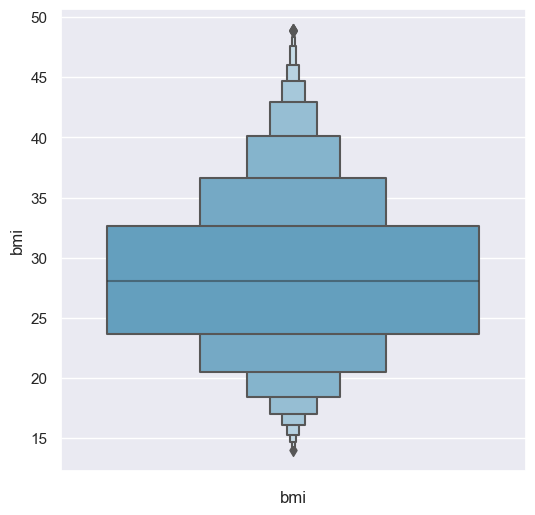

In [8]:
#Remove Outliers

sns.set_theme(style="darkgrid", palette="icefire")
plt.figure(figsize=(6, 6))
sns.boxenplot(y='bmi',data=stroke, showfliers=True).set(xlabel='bmi')

print("Shape before filter: ", stroke.shape)

## **PRE-MODELLING**
1. Encode Label Data
2. Split Data
3. Standardize Data
4. Oversampling Data

In [9]:
#Data separation

X = stroke.iloc[:, :-1]
y = stroke.iloc[:, -1]

In [10]:
X.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status'],
      dtype='object')

In [11]:
#Encode Label Column
#Cols needed to be encode: 'gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status'

cols = ['gender','ever_married', 'work_type', 'Residence_type', 'smoking_status']
one_hot = OneHotEncoder()
one_hot_encoded = one_hot.fit_transform(X[cols]).toarray()

one_hot_df = pd.DataFrame(columns = one_hot.get_feature_names_out(), data=one_hot_encoded)
one_hot_df.head()

X.index = one_hot_df.index
X = pd.concat([X, one_hot_df], axis=1)
X.drop(cols, axis=1, inplace=True)
X

,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Female,gender_Male,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,228.69,36.6,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,80.0,0,1,105.92,32.5,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,49.0,0,0,171.23,34.4,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,79.0,1,0,174.12,24.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,81.0,0,0,186.21,29.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4976,41.0,0,0,70.15,29.8,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4977,40.0,0,0,191.15,31.1,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4978,45.0,1,0,95.02,31.8,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4979,40.0,0,0,83.94,30.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


<Axes: xlabel='stroke'>

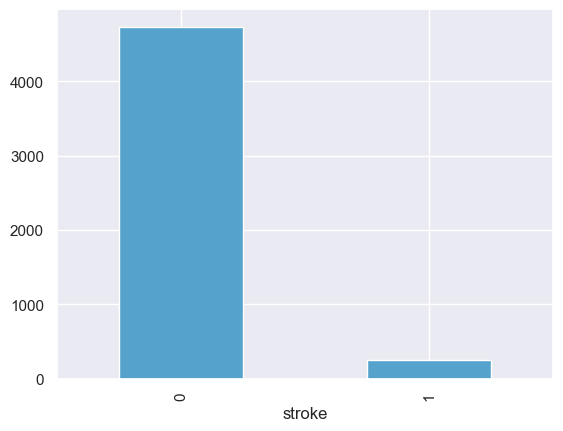

In [12]:
y.value_counts().sort_index().plot.bar()

stroke
1    4733
0    4733
Name: count, dtype: int64


<Axes: xlabel='stroke'>

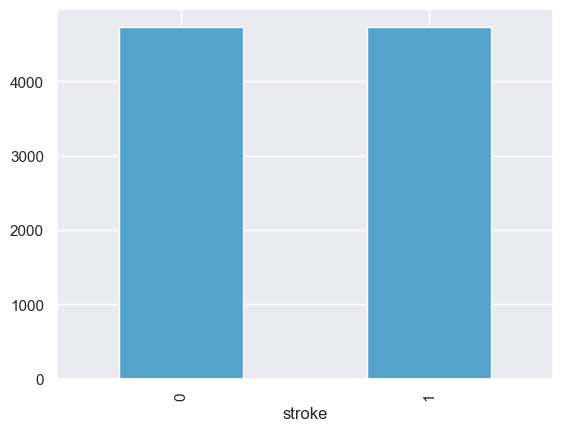

In [13]:
#Oversampling 
sample = RandomOverSampler(sampling_strategy='minority')
X_over, y_over = sample.fit_resample(X, y)
# sample = SMOTE()
# X_balanced, y_balanced = sample.fit_resample(X, y.ravel())

print(y_over.value_counts())
y_over.value_counts().sort_index().plot.bar()

In [30]:
#Split dataset
X_train, X_test, y_train, y_test = train_test_split(X_over, y_over, test_size=0.3, random_state=10)
X_train

,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Female,gender_Male,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
8170,68.0,1,1,247.51,40.5,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
6857,80.0,0,1,105.92,32.5,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
6013,70.0,1,0,89.13,34.2,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
6048,63.0,0,0,208.65,30.7,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
6018,77.0,1,0,124.13,31.4,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9372,79.0,0,0,114.77,27.2,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
7291,73.0,0,0,70.94,34.4,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1344,62.0,0,0,115.13,30.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
7293,81.0,0,0,81.95,16.9,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [31]:
#Standardize data
#Cols needed to be standardize: age, avg_glucose_level, bmi

# cols = ['age', 'avg_glucose_level', 'bmi']
X_train = MinMaxScaler().fit_transform(X_train)
X_test = MinMaxScaler().fit_transform(X_test)

## **MODEL CREATION**
1. Hierarchical Algorithm

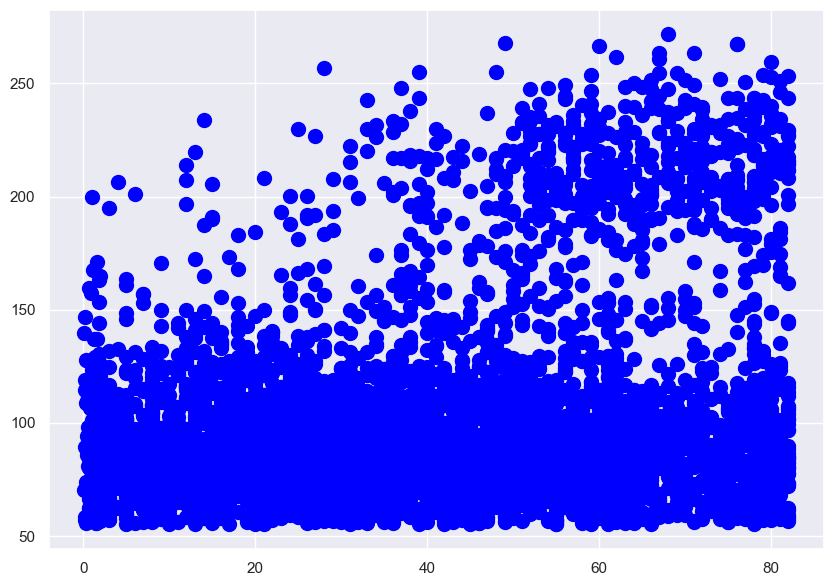

In [32]:
plt.figure(figsize=(10, 7))
plt.scatter(stroke[["age"]], stroke[["avg_glucose_level"]], s=100, c='blue')

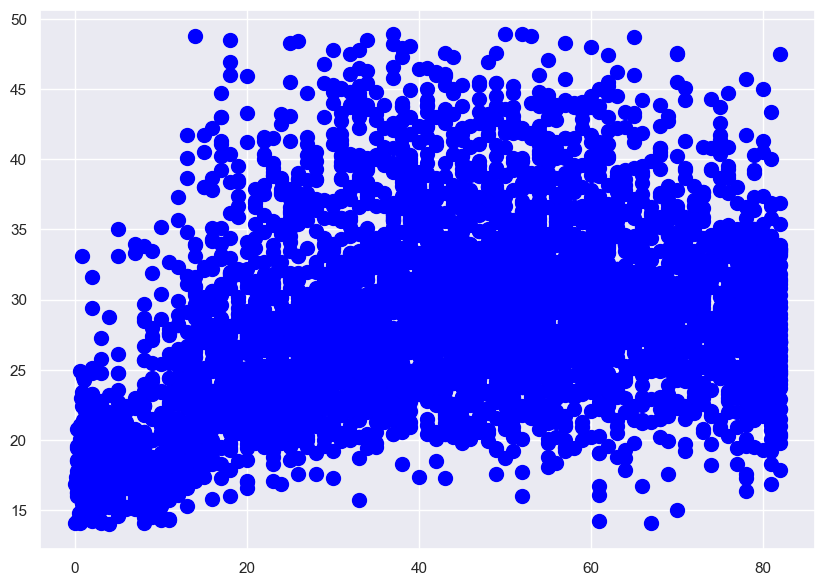

In [33]:
plt.figure(figsize=(10, 7))
plt.scatter(stroke[["age"]], stroke[["bmi"]], s=100, c='blue')

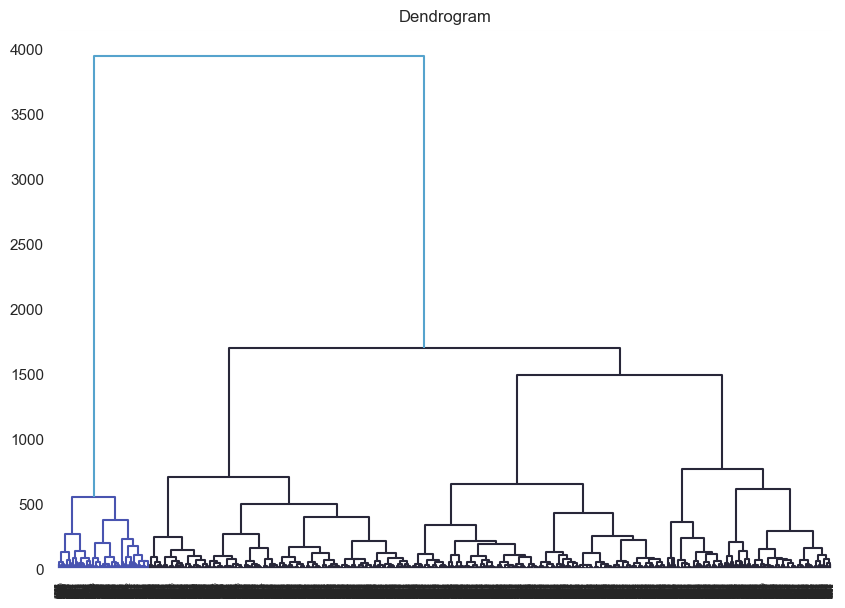

In [34]:
import scipy.cluster.hierarchy as sch
numeric_columns = stroke.select_dtypes(include=['number']).columns

plt.figure(figsize=(10, 7))
dendrogram = sch.dendrogram(sch.linkage(stroke[numeric_columns], method='ward'))
plt.title('Dendrogram')
plt.show()

In [35]:
cluster = AgglomerativeClustering (n_clusters=2, affinity='euclidean', linkage='ward')
cluster.fit_predict(X)

C:\Users\noel\anaconda3\envs\data\Lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


array([1, 0, 1, ..., 0, 0, 0], dtype=int64)

In [36]:
cl=cluster.fit_predict(X)

C:\Users\noel\anaconda3\envs\data\Lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [37]:
from sklearn.metrics import silhouette_score
silhouette_score(X,cl)

0.6526936250686735

C:\Users\noel\anaconda3\envs\data\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\noel\anaconda3\envs\data\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\noel\anaconda3\envs\data\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\noel\anaconda3\envs\data\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\noel\anacon

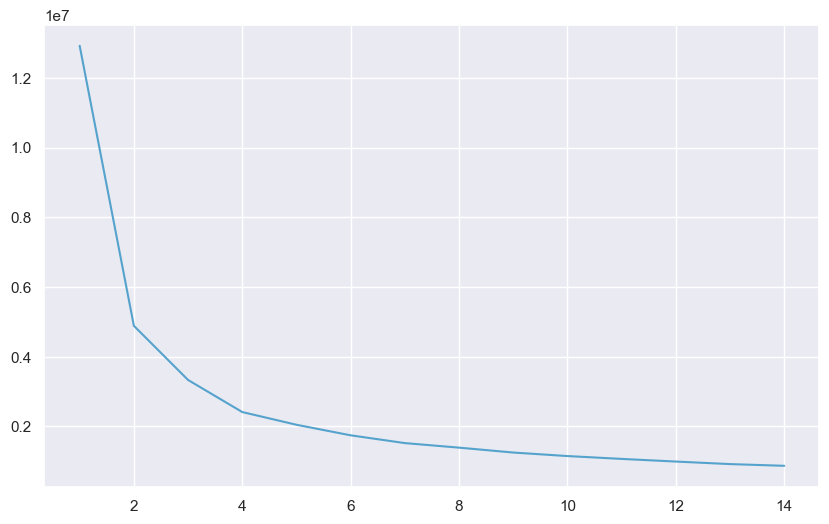

In [38]:
from sklearn.cluster import KMeans
individual_clustering_score=[]
for i in range(1, 15):
    kmeans = KMeans(n_clusters = i, init = 'random', random_state = 42)
    kmeans.fit(X)
    individual_clustering_score.append(kmeans.inertia_)
    
plt.figure(figsize=(10,6))
plt.plot(range(1,15), individual_clustering_score)
plt.show()

In [39]:
kmeans= KMeans(n_clusters = 2, random_state= 42)

kmeans.fit(X)

pred = kmeans.predict(X)

pred

C:\Users\noel\anaconda3\envs\data\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([0, 1, 0, ..., 1, 1, 1])

In [40]:
silhouette_score(X,pred)

0.645302574132893

In [41]:
X_df = pd.DataFrame(X)

In [42]:
agglo = AgglomerativeClustering(n_clusters=2)
agglo.fit(X)
labels = agglo.labels_
hasil_agglo = pd.concat([X, pd.DataFrame({'cluster':labels})], axis=1)
hasil_agglo.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Female,gender_Male,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,cluster
0,67.0,0,1,228.69,36.6,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1
1,80.0,0,1,105.92,32.5,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0
2,49.0,0,0,171.23,34.4,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1
3,79.0,1,0,174.12,24.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1
4,81.0,0,0,186.21,29.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1


In [43]:
dist = 1 - cosine_similarity(X)
pca = PCA(n_components = 2)
pca = pca.fit_transform(dist)

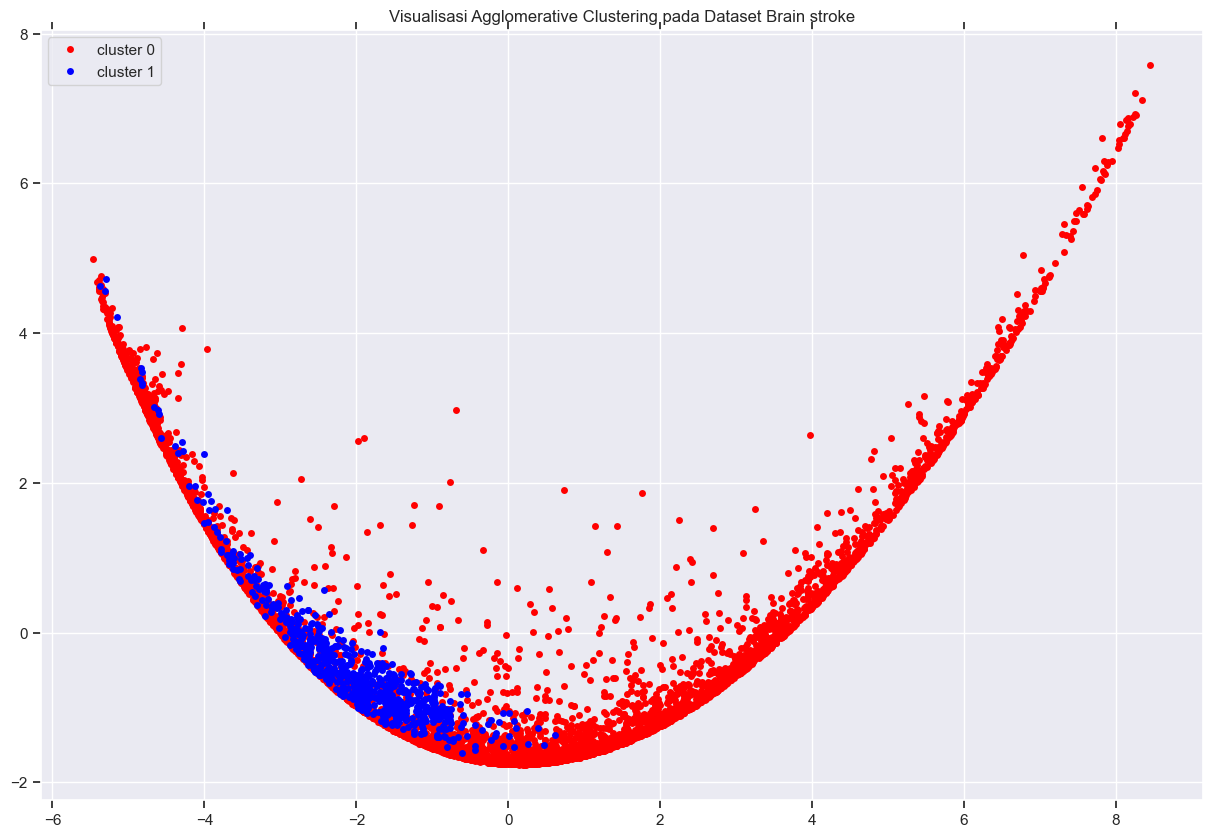

In [44]:
x, y = pca[:, 0], pca[:, 1]
warna = { 0 : 'red', 1 : 'blue'}
label_pca = { 0 : 'cluster 0', 1 : 'cluster 1'}
df = pd.DataFrame({'x' : x, 'y' : y, 'label' : labels})
groups = df.groupby('label')
fig, ax = plt.subplots(figsize=(15, 10))

for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=5, color = warna[name], label = label_pca[name], mec='none')
    ax.set_aspect('auto')
    ax.tick_params(axis='x', which='both', bottom='off', top='off', labelbottom='off')
    ax.tick_params(axis='y', which='both', left='off', top='off', labelleft='off')

ax.legend()
ax.set_title("Visualisasi Agglomerative Clustering pada Dataset Brain stroke")
plt.show()

In [45]:
from sklearn.metrics import silhouette_score
silhouette_coeff = silhouette_score(X, agglo.labels_)
print("Silhouette Score:", silhouette_coeff)


Silhouette Score: 0.6526936250686735
